# Step-by-step demonstration

## Lib Imports and configurations

In [35]:
# %matplotlib notebook
# %matplotlib inline 
%load_ext autoreload
%autoreload 2

import sys
import os
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
from ruptures.metrics import precision_recall, meantime
import scipy.stats as ss

sys.path.append("Codes/")

import TMPD_utils
import TMPD_class

import warnings
warnings.filterwarnings("ignore")

import gc
gc.enable()

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 150)
# pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
pd.options.display.float_format = '{:.4f}'.format


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading event log

In [36]:
# Mapping all event_logs paths
logs_path = glob.glob("Input/Synthetic/Synthetic Event Streams - Resource and Data Perspectives (Antonio)/*.csv")

# Showing mapped paths
print("How many logs? ", len(logs_path))
pd.DataFrame(logs_path).head(30)

How many logs?  1


,0
0,Input/Synthetic/Synthetic Event Streams - Resource and Data Perspectives (Antonio)\recurring_resources_noise0_500_poc.csv


<!-- ![Alt text](../Images/Concept_drift_firstcycle_steps_eng.png "General steps") -->

In [37]:
# Loading first event log
log_path = logs_path[0]
print(log_path.split("\\")[-1].split(".")[0])
event_log = pd.read_csv(log_path, delimiter=";")

# Save original event index
event_log = event_log.reset_index(names='original_index') 


# Showing loaded event log
print("Total events: ", len(event_log))
print("Total cases: ", len(event_log.groupby('case')))
print("Total activities: ", len(event_log.groupby('event')))
event_log.head(15)

recurring_resources_noise0_500_poc
Total events:  5833
Total cases:  500
Total activities:  15


,original_index,case,event,startTime,completeTime,Concept drift,Activity name,Role,Department,Cost,Amount
0,0,0,A,2019/01/10 08:00:00.000,2019/01/10 08:00:00.000,No,Check application form completeness,Loan Officer,Customer Service,10.4982,9611.2749
1,1,0,B,2019/01/10 08:29:19.504,2019/01/10 08:29:19.504,No,Return application back to applicant,Loan Officer,Customer Service,8.4768,9611.2749
2,2,0,C,2019/01/10 08:57:39.719,2019/01/10 08:57:39.719,No,Receive updated application,Loan Officer,Customer Service,8.9373,9611.2749
3,3,0,A,2019/01/10 09:31:04.645,2019/01/10 09:31:04.645,No,Check application form completeness,Loan Officer,Customer Service,5.4250,9611.2749
4,4,0,B,2019/01/10 09:55:46.031,2019/01/10 09:55:46.031,No,Return application back to applicant,Loan Officer,Customer Service,7.2907,9611.2749
5,5,0,C,2019/01/10 10:22:08.125,2019/01/10 10:22:08.125,No,Receive updated application,Loan Officer,Customer Service,10.6213,9611.2749
6,6,0,A,2019/01/10 10:55:48.012,2019/01/10 10:55:48.012,No,Check application form completeness,Loan Officer,Customer Service,11.4588,9611.2749
7,7,0,B,2019/01/10 11:24:09.495,2019/01/10 11:24:09.495,No,Return application back to applicant,Loan Officer,Customer Service,7.5450,9611.2749
8,8,0,C,2019/01/10 11:57:06.369,2019/01/10 11:57:06.369,No,Receive updated application,Loan Officer,Customer Service,7.1694,9611.2749
9,9,0,A,2019/01/10 12:22:04.728,2019/01/10 12:22:04.728,No,Check application form completeness,Loan Officer,Customer Service,9.6185,9611.2749


## Step 1 - Instantiating class and setting event log

In [38]:
# Iniatializing the TMPD_class
TMPD_instance = TMPD_class.TMPD(scenario='offline')

# Setting the transition log
TMPD_instance.set_transition_log(event_log, case_id='case', activity_key='event', timestamp_key='startTime', timestamp_format="infer", other_columns_keys=["Role", "Department", "Cost", "Amount"])

# Executing the transition log
TMPD_instance.run_transition_log()

# Showing the transition log created
print(len(TMPD_instance.get_transition_log()))
TMPD_instance.get_transition_log().head(15)

6333


,case_id,activity_from,timestamp_from,Role_from,Department_from,Cost_from,Amount_from,event_order_from,activity_to,timestamp_to,Role_to,Department_to,Cost_to,Amount_to,event_order_to,case_order,transition_id
0,0,START,2019-01-10 08:00:00.000,Loan Officer,Customer Service,10.4982,9611.2749,0,A,2019-01-10 08:00:00.000,Loan Officer,Customer Service,10.4982,9611.2749,0.0000,0,0
1,0,A,2019-01-10 08:00:00.000,Loan Officer,Customer Service,10.4982,9611.2749,0,B,2019-01-10 08:29:19.504,Loan Officer,Customer Service,8.4768,9611.2749,1.0000,1,1
2,0,B,2019-01-10 08:29:19.504,Loan Officer,Customer Service,8.4768,9611.2749,1,C,2019-01-10 08:57:39.719,Loan Officer,Customer Service,8.9373,9611.2749,2.0000,2,2
3,0,C,2019-01-10 08:57:39.719,Loan Officer,Customer Service,8.9373,9611.2749,2,A,2019-01-10 09:31:04.645,Loan Officer,Customer Service,5.4250,9611.2749,3.0000,3,3
4,0,A,2019-01-10 09:31:04.645,Loan Officer,Customer Service,5.4250,9611.2749,3,B,2019-01-10 09:55:46.031,Loan Officer,Customer Service,7.2907,9611.2749,4.0000,4,4
5,0,B,2019-01-10 09:55:46.031,Loan Officer,Customer Service,7.2907,9611.2749,4,C,2019-01-10 10:22:08.125,Loan Officer,Customer Service,10.6213,9611.2749,5.0000,5,5
6,0,C,2019-01-10 10:22:08.125,Loan Officer,Customer Service,10.6213,9611.2749,5,A,2019-01-10 10:55:48.012,Loan Officer,Customer Service,11.4588,9611.2749,6.0000,6,6
7,0,A,2019-01-10 10:55:48.012,Loan Officer,Customer Service,11.4588,9611.2749,6,B,2019-01-10 11:24:09.495,Loan Officer,Customer Service,7.5450,9611.2749,7.0000,7,7
8,0,B,2019-01-10 11:24:09.495,Loan Officer,Customer Service,7.5450,9611.2749,7,C,2019-01-10 11:57:06.369,Loan Officer,Customer Service,7.1694,9611.2749,8.0000,8,8
9,0,C,2019-01-10 11:57:06.369,Loan Officer,Customer Service,7.1694,9611.2749,8,A,2019-01-10 12:22:04.728,Loan Officer,Customer Service,9.6185,9611.2749,9.0000,9,9


## Step 2 - Setting Window Strategy

In [39]:
# Setting the window strategy parameters
# TMPD_instance.set_windowing_strategy(window_size_mode = 'Fixed', window_size = 1000, window_ref_mode = 'Fixed', overlap = True, sliding_step = 100, continuous = True)
TMPD_instance.set_windowing_strategy(window_size_mode = 'Fixed', window_size = 1000, window_ref_mode = 'Fixed', overlap = True, sliding_step = 100, continuous = True)

# Executing the window strategy indexation
TMPD_instance.run_windowing_strategy()

# Showing the windows indexes
dict(list(TMPD_instance.get_windowing_strategy().items())[:15])

{0: {'start': 0, 'end': 1000, 'window_index': 0},
 1: {'start': 100, 'end': 1100, 'window_index': 1},
 2: {'start': 200, 'end': 1200, 'window_index': 2},
 3: {'start': 300, 'end': 1300, 'window_index': 3},
 4: {'start': 400, 'end': 1400, 'window_index': 4},
 5: {'start': 500, 'end': 1500, 'window_index': 5},
 6: {'start': 600, 'end': 1600, 'window_index': 6},
 7: {'start': 700, 'end': 1700, 'window_index': 7},
 8: {'start': 800, 'end': 1800, 'window_index': 8},
 9: {'start': 900, 'end': 1900, 'window_index': 9},
 10: {'start': 1000, 'end': 2000, 'window_index': 10},
 11: {'start': 1100, 'end': 2100, 'window_index': 11},
 12: {'start': 1200, 'end': 2200, 'window_index': 12},
 13: {'start': 1300, 'end': 2300, 'window_index': 13},
 14: {'start': 1400, 'end': 2400, 'window_index': 14}}

## Step 3 - Setting Process Representation (using Transition Matrix)

In [40]:
# Setting the Transition Matrix (TM) process representation
TMPD_instance.set_process_representation(threshold_anomaly=0
                                    , control_flow_features={'frequency', 'probability', 'causality', 'parallel'}
                                    , time_features={('time_avg','timestamp'), ('time_std','timestamp')}
                                    , resource_features={('categorical_unique', 'Role'), ('categorical_entropy', 'Role')
                                                            , ('categorical_encoding_frequency', 'Role'), ('categorical_encoding_probability', 'Role')
                                                         } 
                                    , data_features={('numerical_avg', 'Amount'), ('numerical_std', 'Amount')
                                                        , ('numerical_avg', 'Cost'), ('numerical_std', 'Cost')
                                                        , ('categorical_unique', 'Department'), ('categorical_entropy', 'Department')
                                                        , ('categorical_encoding_frequency', 'Department'), ('categorical_encoding_probability', 'Department')
                                                    }
                                    ) 

# Executing the process_representation using all dataset just for an example
TMPD_instance.run_process_representation(TMPD_instance.transition_log)

# Showing the process representation created
TMPD_instance.get_process_representation().head(15)

frequency  percentual  causality  parallel  \
activity_from activity_to                                               
A             B                  591      0.0933          1         0   
              D                  500      0.0790          1         0   
B             C                  591      0.0933          1         0   
C             A                  591      0.0933          1         0   
D             F                  500      0.0790          1         0   
E             G                  500      0.0790          1         0   
F             E                  500      0.0790          1         0   
G             H                  235      0.0371          1         0   
              I                  265      0.0418          1         0   
H             END                235      0.0371          1         0   
I             J                  265      0.0418          1         0   
J             K                  127      0.0201          1         0   
              L                  138      0.0218          1         0   
K             M                  127      0.0201          1         0   
L             M                  138      0.0218          1         0   

                           probability  time_std_timestamp  \
activity_from activity_to                                    
A             B                 0.5417              3.4096   
              D                 0.4583              3.0901   
B             C                 1.0000              3.0348   
C             A                 1.0000              3.2387   
D             F                 1.0000              2.8042   
E             G                 1.0000              2.9636   
F             E                 1.0000              2.9056   
G             H                 0.4700              3.1803   
              I                 0.5300              2.9568   
H             END               1.0000              0.0000   
I             J                 1.0000              3.2357   
J             K                 0.4792              2.8105   
              L                 0.5208              3.0096   
K             M                 1.0000              2.3622   
L             M                 1.0000              3.1422   

                           time_avg_timestamp  \
activity_from activity_to                       
A             B                       30.1724   
              D                       29.8819   
B             C                       30.4311   
C             A                       29.6943   
D             F                       30.0099   
E             G                       30.4506   
F             E                       30.3003   
G             H                       29.7800   
              I                       30.0595   
H             END                      0.0000   
I             J                       29.8555   
J             K                       30.6974   
              L                       29.5548   
K             M                       28.8946   
L             M                       30.4696   

                           categorical_encoding_probability_Role_Appraiser->Credit Analyst  \
activity_from activity_to                                                                    
A             B                                                                     0.0000   
              D                                                                     0.0000   
B             C                                                                     0.0000   
C             A                                                                     0.0000   
D             F                                                                     0.0000   
E             G                                                                     0.0000   
F             E                                                                     0.3360   
G             H                                   

## Step 4 - Setting Change Representation

In [41]:
# Defining the change features
change_features_strategy_dict = {
    'delta_matrix_strategy': 
        {
            ### Control Flow Perspective
            'frequency_delta' : {'process_feature':'frequency', 'method':'aggregation', 'agg_function' : 'sum'}
            # , 'probability_delta' : {'process_feature':'probability', 'method':'aggregation', 'agg_function' : 'sum'}
            # , 'causality_delta' : {'process_feature':'causality', 'method':'aggregation', 'agg_function' : 'sum'}
            # , 'parallel_delta' : {'process_feature':'parallel', 'method':'aggregation', 'agg_function' : 'sum'}
            # , 'frequency_delta_percentage' : {'process_feature':'frequency', 'method':'percentage'}
            # , 'prob_freq_delta_weight' : {'process_feature':'probability', 'method':'aggregation_weight', 'agg_function' : 'sum', 'weight_feature' : 'frequency'}

            ### Time Perspective
            , 'time_avg_delta' : {'process_feature':'time_avg_timestamp', 'method':'aggregation', 'agg_function' : 'sum'}
            # , 'time_std_delta' : {'process_feature':'time_std_timestamp', 'method':'aggregation', 'agg_function' : 'sum'}

            ### Resource Perspective
            , 'role_unique_delta' : {'process_feature':'categorical_unique_Role', 'method':'aggregation', 'agg_function' : 'sum'}
            , 'role_entropy_delta' : {'process_feature':'categorical_entropy_Role', 'method':'aggregation', 'agg_function' : 'sum'}
            , 'role_encoding_frequency_delta' : {'process_feature':'categorical_encoding_frequency_Role', 'method':'multiple_aggregation', 'agg_function' : 'sum'}
            , 'role_encoding_probability_delta' : {'process_feature':'categorical_encoding_probability_Role', 'method':'multiple_aggregation', 'agg_function' : 'sum'}

            ### Data Perspective
            , 'amount_avg_delta' : {'process_feature':'numerical_avg_Amount', 'method':'aggregation', 'agg_function' : 'sum'}
            , 'amount_std_delta' : {'process_feature':'numerical_std_Amount', 'method':'aggregation', 'agg_function' : 'sum'}
            , 'cost_avg_delta' : {'process_feature':'numerical_avg_Cost', 'method':'aggregation', 'agg_function' : 'sum'}
            , 'cost_std_delta' : {'process_feature':'numerical_std_Cost', 'method':'aggregation', 'agg_function' : 'sum'}
            , 'department_unique_delta' : {'process_feature':'categorical_unique_Department', 'method':'aggregation', 'agg_function' : 'sum'}
            , 'department_entropy_delta' : {'process_feature':'categorical_entropy_Department', 'method':'aggregation', 'agg_function' : 'sum'}
            , 'department_encoding_frequency_delta' : {'process_feature':'categorical_encoding_frequency_Department', 'method':'multiple_aggregation', 'agg_function' : 'sum'}
            , 'department_encoding_probability_delta' : {'process_feature':'categorical_encoding_probability_Department', 'method':'multiple_aggregation', 'agg_function' : 'sum'}
        }
    , 'statistic_test_strategy' : 
        {
            ### Control Flow Perspective
            # 'frequency_gtest_pvalue' : {'process_feature':'frequency', 'method':'g_test', 'contingency_matrix_sum_value' : '5', 'remove_zeros':'True'}
            # , 'frequency_cramersv' : {'process_feature':'frequency', 'method':'cramers_v', 'contingency_matrix_sum_value' : '5', 'remove_zeros':'True'}

            ### Time Perspective
            # , 'time_avg_timestamp_gtest_pvalue' : {'process_feature':'time_avg_timestamp', 'method':'g_test', 'contingency_matrix_sum_value' : '5', 'remove_zeros':'True'}
        }
    }

# Setting Change Representation
TMPD_instance.set_change_representation(change_features_strategy_dict)

# Executing the Change Representation using the window strategy
TMPD_instance.run_change_representation()

# Showing the Change Representation created
TMPD_instance.get_change_representation().head(20)

,start,end,window_index,reference_window_index,frequency_delta,time_avg_delta,role_unique_delta,role_entropy_delta,role_encoding_frequency_delta,role_encoding_probability_delta,amount_avg_delta,amount_std_delta,cost_avg_delta,cost_std_delta,department_unique_delta,department_entropy_delta,department_encoding_frequency_delta,department_encoding_probability_delta
0,0,1000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100,1100,1,0,30.0000,1.9699,0.0000,0.0000,30.0000,0.0000,2415.0681,1608.0149,1.1342,1.0348,0.0000,0.0000,30.0000,0.0000
2,200,1200,2,0,30.0000,3.1078,0.0000,0.0000,30.0000,0.0000,6386.9002,1213.1226,2.2424,2.3171,0.0000,0.0000,30.0000,0.0000
3,300,1300,3,0,30.0000,3.7379,0.0000,0.0000,30.0000,0.0000,6341.3549,1504.7479,3.7715,2.4895,0.0000,0.0000,30.0000,0.0000
4,400,1400,4,0,42.0000,4.2417,0.0000,0.0000,42.0000,0.0000,6375.6206,2407.5523,3.3835,2.3474,0.0000,0.0000,42.0000,0.0000
5,500,1500,5,0,36.0000,3.9907,0.0000,0.0000,36.0000,0.0000,5772.1834,2453.7988,3.2251,3.4512,0.0000,0.0000,36.0000,0.0000
6,600,1600,6,0,62.0000,4.2987,0.0000,0.0000,62.0000,0.0000,7866.1172,2542.4333,2.9360,3.7051,0.0000,0.0000,62.0000,0.0000
7,700,1700,7,0,74.0000,3.9182,0.0000,0.0000,74.0000,0.0000,8089.4575,6156.4342,2.8249,3.7374,0.0000,0.0000,74.0000,0.0000
8,800,1800,8,0,56.0000,4.8093,0.0000,0.0000,56.0000,0.0000,9392.3090,7213.3123,3.3660,4.2325,0.0000,0.0000,56.0000,0.0000
9,900,1900,9,0,84.0000,5.5077,0.0000,0.0000,84.0000,0.0000,9077.4936,8504.1111,4.2062,4.2948,0.0000,0.0000,84.0000,0.0000


## Step 5 - Setting Detection Task

In [42]:
# Defining detection strategies
detection_task_strategy_dict = {
    'time_series_strategy': 
    {
        ### Control Flow Perspective
        'cpd_frequency_delta' : {'change_features':['frequency_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        # , 'cpd_prob_freq_delta' : {'change_features':['prob_freq_delta_weight'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        # , 'cpd_prob_causality_delta' : {'change_features':['causality_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        # , 'cpd_prob_parallel_delta' : {'change_features':['parallel_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        # , 'cramersv_frequency' : {'change_features':['frequency_cramersv'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'

        ### Time Perspective
        , 'cpd_time_avg_delta' : {'change_features':['time_avg_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        # , 'cpd_time_std_delta' : {'change_features':['time_std_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'

        ### Resource Perspective
        , 'cpd_role_unique_delta' : {'change_features':['role_unique_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        , 'cpd_role_entropy_delta' : {'change_features':['role_entropy_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        , 'cpd_role_encoding_frequency_delta' : {'change_features':['role_encoding_frequency_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        , 'cpd_role_encoding_probability_delta' : {'change_features':['role_encoding_probability_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'

        ### Data Perspective
        , 'cpd_amount_avg_delta' : {'change_features':['amount_avg_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        , 'cpd_amount_std_delta' : {'change_features':['amount_std_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        , 'cpd_cost_avg_delta' : {'change_features':['cost_avg_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        , 'cpd_cost_std_delta' : {'change_features':['cost_std_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1'
        , 'cpd_department_unique_delta' : {'change_features':['department_unique_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1
        , 'cpd_department_entropy_delta' : {'change_features':['department_entropy_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1
        , 'cpd_department_encoding_frequency_delta' : {'change_features':['department_encoding_frequency_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1
        , 'cpd_department_encoding_probability_delta' : {'change_features':['department_encoding_probability_delta'], 'method':'cpd_pelt', 'smooth' : '3'} #, 'model' : 'rbf', 'cost' : 'rpt.costs.CostRbf()', 'min_size' : '1', 'jump' : '1
    }
    , 'threshold_strategy' : 
    {
        ### Control Flow Perspective
        # 'gtest_frequency' : {'change_features':['frequency_gtest_pvalue'], 'method':'comparison_operator', 'operator' : 'le', 'threshold_value' : '0.025', 'smooth' : '3'}
        # , 'cramersv_frequency' : {'change_features':['frequency_cramersv'], 'method':'comparison_operator', 'operator' : 'ge', 'threshold_value' : '0.05', 'smooth' : '3'}
        # , 'fixed_frequency_delta_percentage' : {'change_features':['frequency_delta_percentage'], 'method':'comparison_operator', 'operator' : 'ge', 'threshold_value' : '0.05', 'smooth' : '3'}
    }
}

# Setting Detection Task
TMPD_instance.set_detection_task(detection_task_strategy_dict)

# Executing the Detection Task
TMPD_instance.run_detection_task()

# Showing Detection Task Results
TMPD_instance.get_detection_task()


,detection_strategy,detection_feature,detection_results
0,time_series_strategy,cpd_frequency_delta,"[19, 30, 41, 54]"
1,time_series_strategy,cpd_time_avg_delta,"[18, 29, 40, 54]"
2,time_series_strategy,cpd_role_unique_delta,"[14, 43, 54]"
3,time_series_strategy,cpd_role_entropy_delta,"[14, 43, 54]"
4,time_series_strategy,cpd_role_encoding_frequency_delta,"[16, 40, 54]"
5,time_series_strategy,cpd_role_encoding_probability_delta,"[17, 39, 54]"
6,time_series_strategy,cpd_amount_avg_delta,"[17, 39, 54]"
7,time_series_strategy,cpd_amount_std_delta,"[14, 43, 54]"
8,time_series_strategy,cpd_cost_avg_delta,"[17, 39, 54]"
9,time_series_strategy,cpd_cost_std_delta,"[14, 43, 54]"


In [43]:
# Grounding truth
log_size = event_log['case'].nunique()
ground_truth_traces_indexes = list(range(int(log_size/3), log_size, int(log_size/3+1)))

transition_log = TMPD_instance.get_transition_log()
ground_truth_events_indexes = transition_log[transition_log['case_id'].isin(ground_truth_traces_indexes)].groupby('case_id').first()['transition_id'].to_list()

# signals_indexes = signals.reset_index()
signals = TMPD_instance.get_change_representation()
ground_truth = []
for ground_truth_events_index in ground_truth_events_indexes:
    ground_truth.extend(signals[(signals['start'] <= ground_truth_events_index) 
                & (signals['end'] >= ground_truth_events_index)].head(1).index.to_list())
ground_truth = ground_truth + [len(signals)]
print("ground_truth: ", ground_truth)

ground_truth:  [11, 33, 54]


In [44]:
### Validation metrics
margin_error_defined=3
detection_task_results = TMPD_instance.get_detection_task()
for index, row in detection_task_results.iterrows():
    try:
        detection_task_results.loc[index, 'ground_truth'] = str(ground_truth)

        # smooth = int(detection_task_strategy_dict[row['detection_strategy']][row['detection_feature']]['smooth'])

        # Margin of error give more margin to overlap if used.
        margin_error = int(margin_error_defined + 1)  if TMPD_instance.overlap == False else int(margin_error_defined + 1 + TMPD_instance.window_size/TMPD_instance.sliding_step)

        precision, recall = precision_recall(ground_truth, row['detection_results'], margin=margin_error)

        f1 = round(ss.hmean([precision, recall]),2)
        detection_task_results.loc[index, 'f1'] = f1
        
        delay = round(meantime(ground_truth, row['detection_results']), 2)
        detection_task_results.loc[index, 'delay'] = delay

    except Exception as e:
        print("Error:", e)
        detection_task_results.loc[index, 'ground_truth'] = str(ground_truth)
        detection_task_results.loc[index, 'f1'] = np.nan
        detection_task_results.loc[index, 'delay'] = np.nan

detection_task_results

,detection_strategy,detection_feature,detection_results,ground_truth,f1,delay
0,time_series_strategy,cpd_frequency_delta,"[19, 30, 41, 54]","[11, 33, 54]",0.8000,6.3300
1,time_series_strategy,cpd_time_avg_delta,"[18, 29, 40, 54]","[11, 33, 54]",0.8000,6.0000
2,time_series_strategy,cpd_role_unique_delta,"[14, 43, 54]","[11, 33, 54]",1.0000,6.5000
3,time_series_strategy,cpd_role_entropy_delta,"[14, 43, 54]","[11, 33, 54]",1.0000,6.5000
4,time_series_strategy,cpd_role_encoding_frequency_delta,"[16, 40, 54]","[11, 33, 54]",1.0000,6.0000
5,time_series_strategy,cpd_role_encoding_probability_delta,"[17, 39, 54]","[11, 33, 54]",1.0000,6.0000
6,time_series_strategy,cpd_amount_avg_delta,"[17, 39, 54]","[11, 33, 54]",1.0000,6.0000
7,time_series_strategy,cpd_amount_std_delta,"[14, 43, 54]","[11, 33, 54]",1.0000,6.5000
8,time_series_strategy,cpd_cost_avg_delta,"[17, 39, 54]","[11, 33, 54]",1.0000,6.0000
9,time_series_strategy,cpd_cost_std_delta,"[14, 43, 54]","[11, 33, 54]",1.0000,6.5000


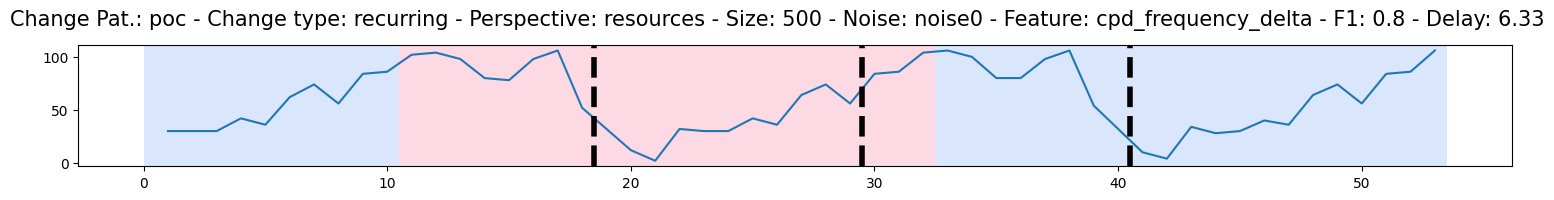

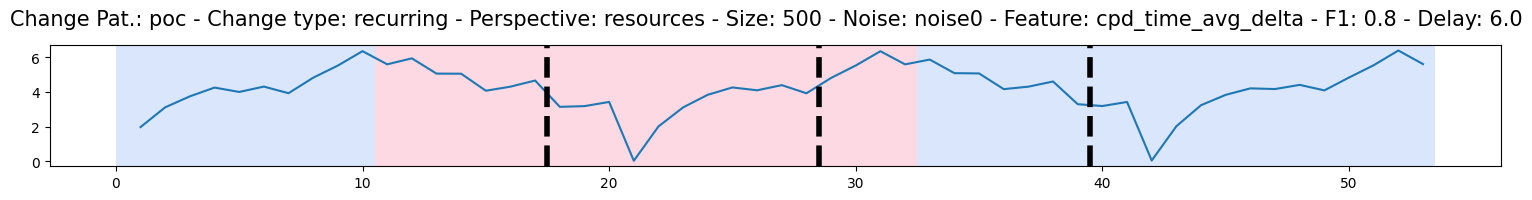

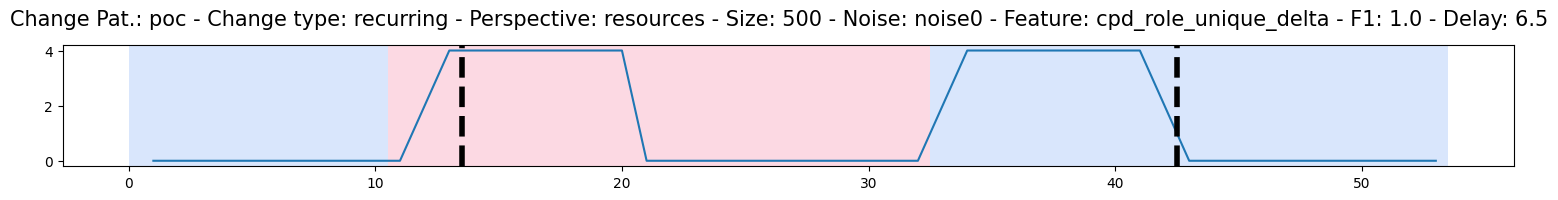

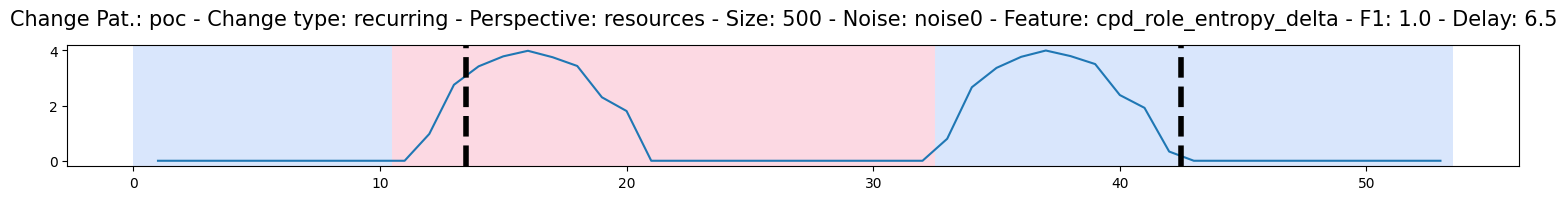

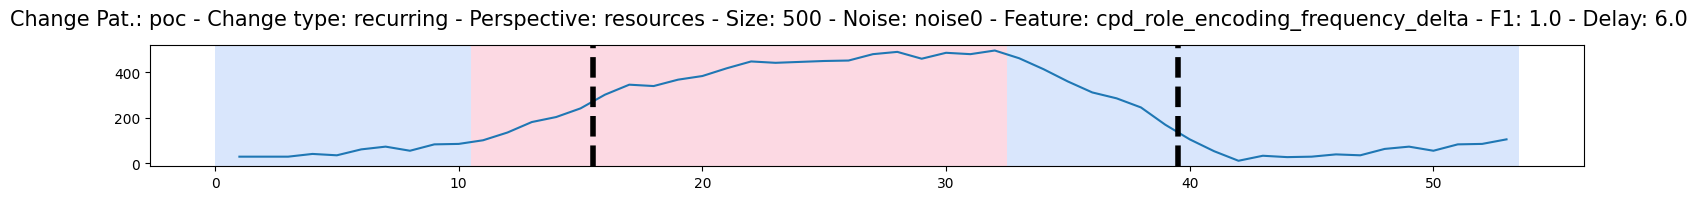

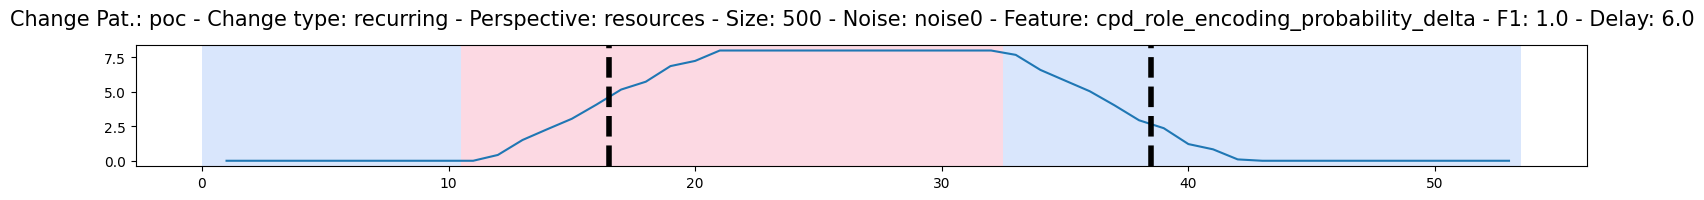

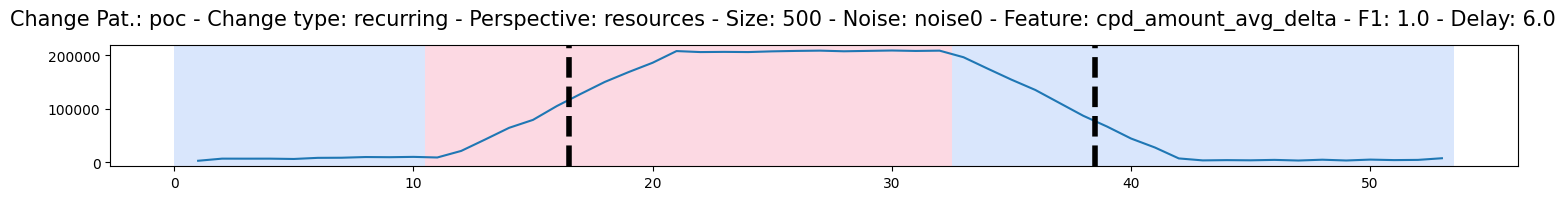

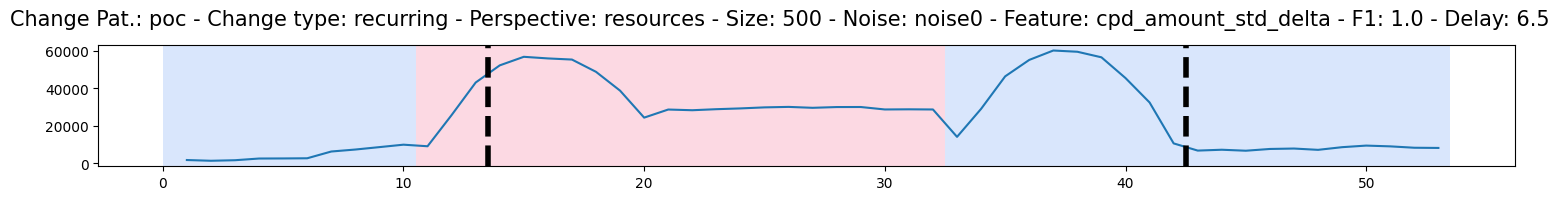

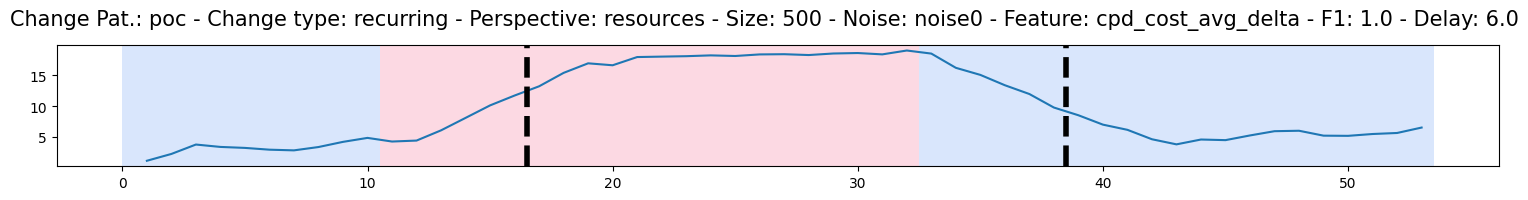

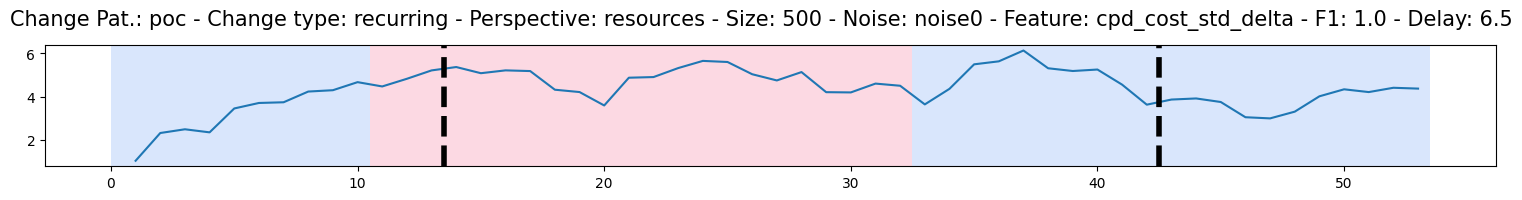

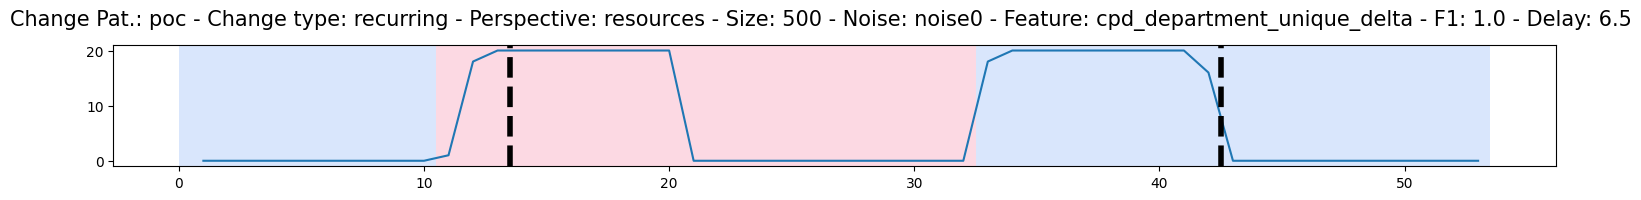

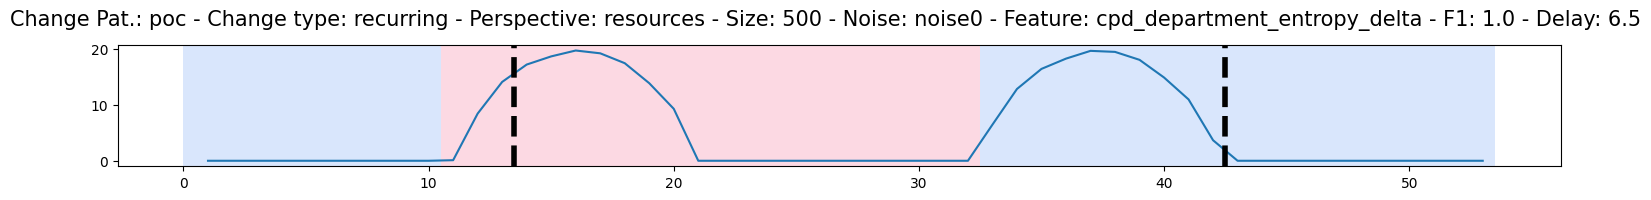

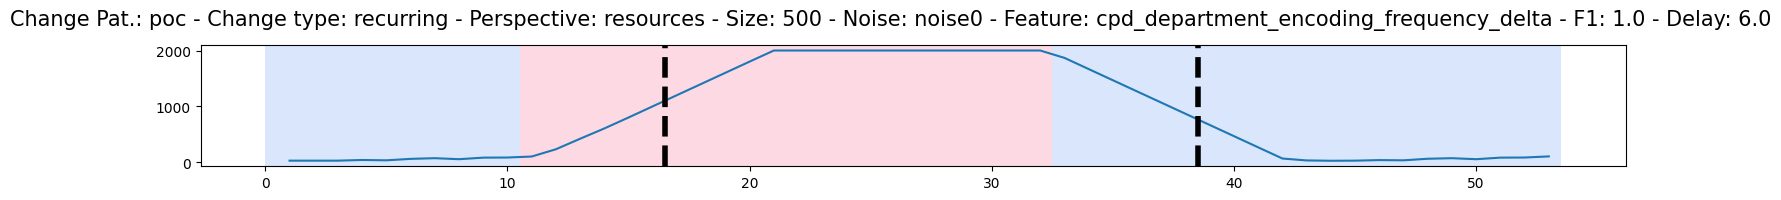

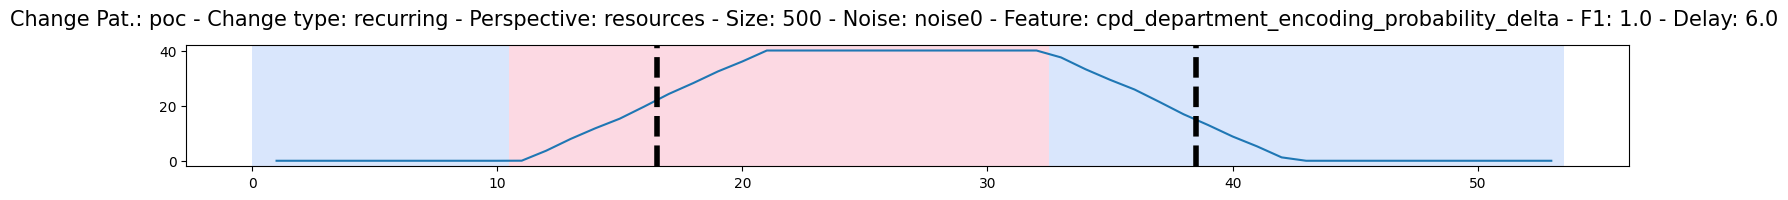

In [45]:
# Display Detection Task Results 
for result in detection_task_results.itertuples():
    fig, axarr = rpt.display(signal = TMPD_instance.get_change_representation()[TMPD_instance.detection_task_strategy_dict[result.detection_strategy][result.detection_feature]['change_features']]
                , true_chg_pts=ground_truth
                , computed_chg_pts = result.detection_results
                , computed_chg_pts_color = "k"
                , computed_chg_pts_linewidth = 4
                , computed_chg_pts_linestyle = "--"
                , computed_chg_pts_alpha = 1
                , figsize=(15, 2)
                )
    plt.suptitle("Change Pat.: " + log_path.split("/")[-1].split("_")[-1].split(".")[0]
                 + " - Change type: " + log_path.split("/")[-1].split("_")[-5].split("\\")[-1]
                 + " - Perspective: " + log_path.split("/")[-1].split("_")[-4]
                 + " - Size: " + log_path.split("/")[-1].split("_")[-2]
                 + " - Noise: " + log_path.split("/")[-1].split("_")[-3] 
                 + " - Feature: " + result.detection_feature
                 + " - F1: " + str(result.f1) 
                 + " - Delay: " + str(result.delay)
                 , fontsize=15)

    plt.subplots_adjust(top=0.8)
    plt.show()

## Step 6a - Setting Localization Task

In [46]:
# Show the process representation created for the first window (get)
TMPD_instance.run_process_representation(TMPD_instance.transition_log.iloc[TMPD_instance.get_windowing_strategy()[0]['start'] : TMPD_instance.get_windowing_strategy()[0]['end']])
TMPD_instance.get_process_representation()

frequency  percentual  causality  parallel  \
activity_from activity_to                                               
A             B                   92      0.0920          1         0   
              D                   81      0.0810          1         0   
B             C                   92      0.0920          1         0   
C             A                   92      0.0920          1         0   
D             F                   81      0.0810          1         0   
E             G                   81      0.0810          1         0   
F             E                   81      0.0810          1         0   
G             H                   42      0.0420          1         0   
              I                   39      0.0390          1         0   
H             END                 42      0.0420          1         0   
I             J                   39      0.0390          1         0   
J             K                   16      0.0160          1         0   
              L                   23      0.0230          1         0   
K             M                   16      0.0160          1         0   
L             M                   23      0.0230          1         0   
M             N                   18      0.0180          1         0   
              O                   21      0.0210          1         0   
N             END                 18      0.0180          1         0   
O             END                 21      0.0210          1         0   
START         A                   82      0.0820          1         0   

                           probability  time_std_timestamp  \
activity_from activity_to                                    
A             B                 0.5318              3.4422   
              D                 0.4682              3.3016   
B             C                 1.0000              3.1276   
C             A                 1.0000              3.2591   
D             F                 1.0000              2.7648   
E             G                 1.0000              2.6956   
F             E                 1.0000              3.0753   
G             H                 0.5185              2.9717   
              I                 0.4815              2.8876   
H             END               1.0000              0.0000   
I             J                 1.0000              3.1499   
J             K                 0.4103              2.3172   
              L                 0.5897              3.3305   
K             M                 1.0000              2.6316   
L             M                 1.0000              3.0059   
M             N                 0.4615              2.5772   
              O                 0.5385              2.5273   
N             END               1.0000              0.0000   
O             END               1.0000              0.0000   
START         A                 1.0000              0.0000   

                           time_avg_timestamp  \
activity_from activity_to                       
A             B                       29.9194   
              D                       29.8999   
B             C                       30.5042   
C             A                       29.5743   
D             F                       29.6111   
E             G                       30.6470   
F             E                       30.4409   
G             H                       29.8206   
              I                       30.2694   
H             END                      0.0000   
I             J                       29.9050   
J             K                       30.4120   
              L                       29.1207   
K             M                       29.0600   
L             M                       30.1935   
M             N                       30.0052   
              O                       29.0869   
N             END                      0.0000   
O             END                      0.0000   
START         A           

In [47]:
# Showing the process representation created for the 15th window
TMPD_instance.run_process_representation(TMPD_instance.transition_log.iloc[TMPD_instance.get_windowing_strategy()[20]['start'] : TMPD_instance.get_windowing_strategy()[20]['end']])
TMPD_instance.get_process_representation()


frequency  percentual  causality  parallel  \
activity_from activity_to                                               
A             B                   91      0.0910          1         0   
              D                   81      0.0810          1         0   
B             C                   91      0.0910          1         0   
C             A                   90      0.0900          1         0   
D             F                   81      0.0810          1         0   
E             G                   82      0.0820          1         0   
F             E                   82      0.0820          1         0   
G             H                   43      0.0430          1         0   
              I                   39      0.0390          1         0   
H             END                 43      0.0430          1         0   
I             J                   39      0.0390          1         0   
J             K                   17      0.0170          1         0   
              L                   22      0.0220          1         0   
K             M                   17      0.0170          1         0   
L             M                   22      0.0220          1         0   
M             N                   18      0.0180          1         0   
              O                   21      0.0210          1         0   
N             END                 18      0.0180          1         0   
O             END                 21      0.0210          1         0   
START         A                   82      0.0820          1         0   

                           probability  time_std_timestamp  \
activity_from activity_to                                    
A             B                 0.5291              3.3508   
              D                 0.4709              3.3713   
B             C                 1.0000              3.1118   
C             A                 1.0000              3.3253   
D             F                 1.0000              2.6374   
E             G                 1.0000              2.5809   
F             E                 1.0000              2.7486   
G             H                 0.5244              3.0032   
              I                 0.4756              3.0220   
H             END               1.0000              0.0000   
I             J                 1.0000              3.1942   
J             K                 0.4359              2.5363   
              L                 0.5641              3.0710   
K             M                 1.0000              2.2557   
L             M                 1.0000              2.9595   
M             N                 0.4615              2.6425   
              O                 0.5385              2.4919   
N             END               1.0000              0.0000   
O             END               1.0000              0.0000   
START         A                 1.0000              0.0000   

                           time_avg_timestamp  \
activity_from activity_to                       
A             B                       30.1338   
              D                       29.7867   
B             C                       30.4084   
C             A                       29.4850   
D             F                       29.9186   
E             G                       30.5617   
F             E                       30.5643   
G             H                       30.1969   
              I                       30.6813   
H             END                      0.0000   
I             J                       30.1352   
J             K                       30.2719   
              L                       29.0962   
K             M                       28.6507   
L             M                       29.8505   
M             N                       29.8986   
              O                       28.7419   
N             END                      0.0000   
O             END                      0.0000   
START         A           

In [48]:
# Setting Localization Task
TMPD_instance.set_localization_task(reference_window_index=0, detection_window_index=15, pvalue_threshold=0.05, effect_prop_threshold=0.2, effect_count_threshold=0.02, pseudo_count=5)

# Executing Localization Task
TMPD_instance.run_localization_task()

# Showing Localization Task Results
TMPD_instance.get_localization_task(show_localization_dfg=True, show_original_dfg=False, show_original_bpmn=True)

ValueError: The internally computed table of expected frequencies has a zero element at (0, 0).

## Step 6b - Setting Characterization Task

In [42]:
# TODO

## Step 6c - Setting Explanation Task

In [43]:
# TODO